In [20]:
import numpy as np
import pandas as pd
import boto3
import diff_classifier.aws as aws
import os


In [16]:
bucket = 'dash2927.data'
remote_folder = 'Andreas_surfactant_data'

In [4]:
np.random.randn()

-1.2540813890601477

In [66]:
SPACE_UNITS = 'pixels'
TIME_UNITS = 'frames'

N_PARTICLES = 1000
N_TIME_STEPS = np.random.randint(0, 650)

# Diffusion coefficient. Will set the amplitude of the random displacement
D  = np.random.rand(0,26); # <pixels^2/frame>
# Time step between acquisition; fast acquisition!
dt = 1 # Frame
# Mean velocity
vm = np.random.normal(loc = 21.61, scale = 37.85) # pixel/frame
# Area size, just used to disperse particles in 2D. Has no impact on
# analysis
SIZE = 2 # pixels

In [74]:
simulated_data = pd.DataFrame(columns = ['Frame', 'Track_ID', 'X', 'Y', 'MSDs', 'Gauss'])
sim_dict = {'Frame':np.nan, 'Track_ID':np.nan, 'X':np.nan, 'Y':np.nan, 'MSDs':np.nan, 'Gauss':np.nan}
k = sqrt(2*D*dt)



In [ ]:
tracks = cell(N_PARTICLES, 1);

k = sqrt(2 * D * dT);
for i = 1 : N_PARTICLES

    % Time
    time = (0 : N_TIME_STEPS-1)' * dT;

    % Velocity orientation
    theta = 2 * pi * rand;

    % Mean velocity
    v = vm * (1 + 1/4*randn);

    % Initial position
    X0 = SIZE .* rand(1, 2);

    % Instantaneous displacement:
    dX_brownian = k * randn(N_TIME_STEPS, 2);
    dX_directed = v * dT * ...
        [ cos(theta)*ones(N_TIME_STEPS,1) sin(theta)*ones(N_TIME_STEPS,1) ];

    % Integrate uncorrelated displacement
    dX = dX_brownian + dX_directed;
    dX(1, :) = X0;
    X = cumsum(dX, 1);

    % Store
    tracks{i} = [time X];

end
clear i X dX time X0

# The following was used to get initial values

In [12]:
def get_matching_s3_keys(bucket, prefix='', suffix=''):
    """
    Generate the keys in an S3 bucket.

    :param bucket: Name of the S3 bucket.
    :param prefix: Only fetch keys that start with this prefix (optional).
    :param suffix: Only fetch keys that end with this suffix (optional).
    """
    kwargs = {'Bucket': bucket, 'Prefix': prefix}
    while True:
        resp = s3.list_objects_v2(**kwargs)
        for obj in resp['Contents']:
            key = obj['Key']
            if key.endswith(suffix):
                yield key
        try:
            kwargs['ContinuationToken'] = resp['NextContinuationToken']
        except KeyError:
            break

s3 = boto3.client('s3')
keys = get_matching_s3_keys(bucket, prefix = remote_folder)
to_track = []

for file in keys:
    if(len(remote_folder.split('/'))+1==len(file.split('/'))): # Some bullshit
        if 'features' in file.split('/')[-1].split('_')[0] and '.png' not in file.split('/')[-1].split('_')[-1]:
            to_track.append(file.split('/')[-1].split('.csv')[0]) # Appending the file name without .tif
to_track = to_track[1:] # Reomving the first value since it's blank
dl_list = to_track
del to_track

In [69]:
max_Deff = 0
min_Deff = np.inf
for filename in dl_list:
    print(remote_folder + '/' + filename)
    aws.download_s3(remote_folder + '/' + filename + '.csv', filename, bucket_name=bucket)
    fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
    print(fstats['Deff1'].dropna().max())
    print(fstats['Deff1'].dropna().min())
    print(fstats['Deff2'].dropna().max())
    print(fstats['Deff2'].dropna().min())
    max_Deff = np.max([max_Deff, fstats['Deff1'].dropna().max()*(fstats['Deff1'].dropna().max()!=np.nan)])
    min_Deff = np.min([min_Deff, fstats['Deff1'].dropna().min()*(fstats['Deff1'].dropna().min()!=np.nan)])
    print(max_Deff)
    print(min_Deff)
    os.remove(filename)

Andreas_surfactant_data/features_Traj_CHA_S1_2
17.094185156928578
0.125125181270268
17.804406251281183
0.014471437194524268
17.094185156928578
0.125125181270268
Andreas_surfactant_data/features_Traj_CHA_S1_3
15.796940600066804
0.019219325889504445
12.146930503848145
0.008003753301506659
17.094185156928578
0.019219325889504445
Andreas_surfactant_data/features_Traj_CHA_S1_4
22.112375178615913
0.124666415548487
12.959457370476143
0.00040434120634597683
22.112375178615913
0.019219325889504445
Andreas_surfactant_data/features_Traj_CHA_S1_5
22.129649222436985
0.12515137093068673
13.336273631244257
0.027120115710792484
22.129649222436985
0.019219325889504445
Andreas_surfactant_data/features_Traj_CHA_S2_1
25.140818779507022
0.006150341872695398
8.96913541994747
0.0006644526455918053
25.140818779507022
0.006150341872695398
Andreas_surfactant_data/features_Traj_CHA_S2_2
12.298218835338762
0.006436604597229614
23.39560287394815
0.0007077136091048339
25.140818779507022
0.006150341872695398
Andreas

4.179558452569749
0.06425262269993229
1.5421794075691853
0.037466180721882715
25.140818779507022
0.0021702724435188935
Andreas_surfactant_data/features_Traj_P80_S2_3
7.719860088583415
0.4294580500018214
2.187123259092408
0.6064424042145636
25.140818779507022
0.0021702724435188935
Andreas_surfactant_data/features_Traj_P80_S2_4
4.666377305493646
0.21043584828426865
1.754557740950318
0.09994431079175498
25.140818779507022
0.0021702724435188935
Andreas_surfactant_data/features_Traj_P80_S2_5
5.719183064860491
0.021662137134638187
4.521504566297217
0.023237050242282446
25.140818779507022
0.0021702724435188935
Andreas_surfactant_data/features_Traj_P80_S3_1
11.580326237974507
0.2388591545775665
1.4546406890740753
0.061892593715258015
25.140818779507022
0.0021702724435188935
Andreas_surfactant_data/features_Traj_P80_S3_2
6.778530338246176
0.14763195344307484
0.2883079268305822
0.07339718886264462
25.140818779507022
0.0021702724435188935
Andreas_surfactant_data/features_Traj_P80_S3_3
7.044140436

In [38]:
dl_list

['features_Traj_CHA_S1_2',
 'features_Traj_CHA_S1_3',
 'features_Traj_CHA_S1_4',
 'features_Traj_CHA_S1_5',
 'features_Traj_CHA_S2_1',
 'features_Traj_CHA_S2_2',
 'features_Traj_CHA_S2_3',
 'features_Traj_CHA_S2_4',
 'features_Traj_CHA_S2_5',
 'features_Traj_CHA_S3_1',
 'features_Traj_CHA_S3_2',
 'features_Traj_CHA_S3_3',
 'features_Traj_CHA_S3_4',
 'features_Traj_CHA_S3_5',
 'features_Traj_DI_S1_1',
 'features_Traj_DI_S1_2',
 'features_Traj_DI_S1_3',
 'features_Traj_DI_S1_4',
 'features_Traj_DI_S1_5',
 'features_Traj_DI_S2_1',
 'features_Traj_DI_S2_2',
 'features_Traj_DI_S2_3',
 'features_Traj_DI_S2_4',
 'features_Traj_DI_S2_5',
 'features_Traj_DI_S3_1',
 'features_Traj_DI_S3_2',
 'features_Traj_DI_S3_3',
 'features_Traj_DI_S3_4',
 'features_Traj_DI_S3_5',
 'features_Traj_F127_S1_1',
 'features_Traj_F127_S1_2',
 'features_Traj_F127_S1_3',
 'features_Traj_F127_S1_4',
 'features_Traj_F127_S1_5',
 'features_Traj_F127_S2_1',
 'features_Traj_F127_S2_2',
 'features_Traj_F127_S2_3',
 'featur

In [72]:
max_Deff

25.140818779507022

In [73]:
min_Deff

0.0008402287141890532

In [76]:
test = [1,2,3,4,5,6]


In [77]:
import seaborn as sns

In [80]:
g = sns.catplot(x="precision", y="recall", hue="smoker", col="time", data={'precision': [0.9610, 0.9296], 'recall': [0.9824, 0.8537]}, kind="bar", height=4, aspect=.7);

ValueError: Could not interpret input 'smoker'

In [81]:
sns.set(style="darkgrid")
titanic = sns.load_dataset("titanic")

In [138]:
df = pd. DataFrame([{'metric':'precision', 'type':'P14', 'value':0.6141},
{'metric':'recall', 'type':'P14', 'value':0.3879},
{'metric':'f1-score', 'type':'P14', 'value':0.4755},
{'metric':'precision', 'type':'P35', 'value':0.8038},
{'metric':'recall', 'type':'P35', 'value':0.9114},
{'metric':'f1-score', 'type':'P35', 'value':0.8542}], columns = ['metric', 'type', 'value'])




In [104]:
df

,metric,type,value


In [139]:
import matplotlib.pyplot as plt

fig = plt.Figure(figsize = (30,20))

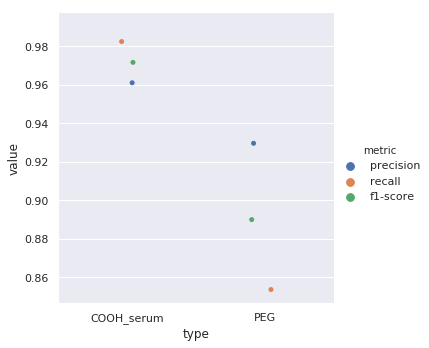

In [108]:
ax = sns.catplot(x = "type", y= "value", hue="metric", data=df)

<IPython.core.display.Javascript object>


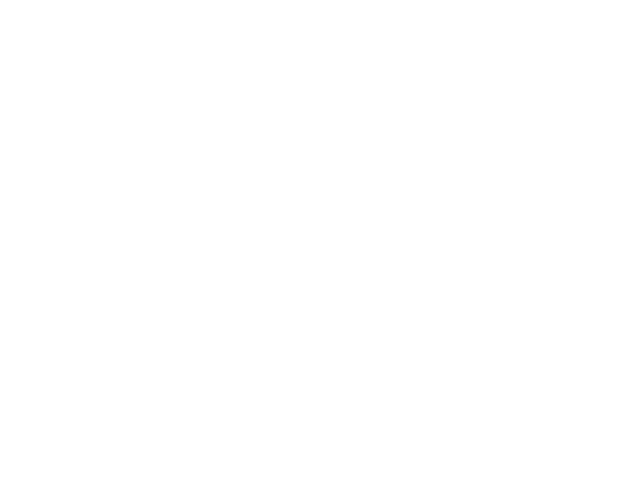

<IPython.core.display.Javascript object>


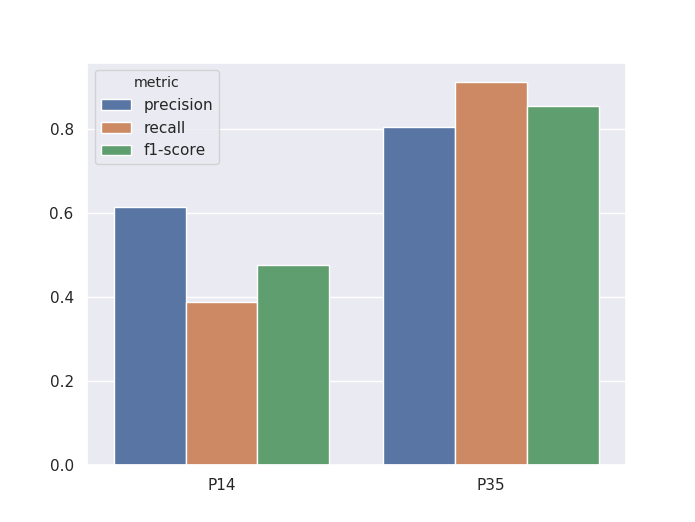

Text(0, 0.5, '')

In [140]:
fig = plt.figure()
%matplotlib notebook
ax = sns.barplot(x = "type", y= "value", hue="metric", data = df)  
plt.xlabel('')
plt.ylabel('')

In [114]:
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3, fancybox=True, shadow=True)
plt.show()